In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.metrics import  confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

In [4]:
# creating directory
import os
try:
    os.mkdir("antispoofing_dataset")
    os.mkdir("antispoofing_dataset/test")
    os.mkdir("antispoofing_dataset/train")
    os.mkdir("antispoofing_dataset/valid")
    os.mkdir("antispoofing_dataset/train/real")
    os.mkdir("antispoofing_dataset/train/spoof")
    os.mkdir("antispoofing_dataset/train/animals")
    os.mkdir("antispoofing_dataset/test/real")
    os.mkdir("antispoofing_dataset/test/spoof")
    os.mkdir("antispoofing_dataset/test/animals")
    os.mkdir("antispoofing_dataset/valid/real")
    os.mkdir("antispoofing_dataset/valid/spoof")
    os.mkdir("antispoofing_dataset/valid/animals")
except FileExistsError:
    print("File Already exist")
    

    
    

In [5]:
dataset_path = "final_antispoofing"
test_path = "antispoofing_dataset/test"
train_path = "antispoofing_dataset/train"
valid_path = "antispoofing_dataset/valid"
animals_path = "antispoofing_dataset/animals"

In [73]:

def train_test_split(doct):
    for i_split in os.listdir(doct):
        path_i_split = os.path.join(doct, i_split)
        for cat in os.listdir(path_i_split):
            path_cat = os.path.join(path_i_split, cat)
            for sub in os.listdir(path_cat):
                path_sub = os.path.join(path_cat, sub)
                for img in os.listdir(path_sub):
                    if i_split == 'train':
                        shutil.copy(os.path.join(path_sub, img), os.path.join(train_path, cat, img))
                    else:
                        shutil.copy(os.path.join(path_sub, img), os.path.join(test_path, cat, img))
                    
                        
train_test_split(doct=dataset_path)

KeyboardInterrupt: 

In [8]:
real_samples = random.sample(os.listdir(f'antispoofing_dataset/test/real'), 300)
for i in real_samples:
    shutil.move(f'antispoofing_dataset/test/real/{i}', f'antispoofing_dataset/valid/real')

spoof_samples = random.sample(os.listdir(f'antispoofing_dataset/test/spoof'), 300)
for k in spoof_samples:
    shutil.move(f'antispoofing_dataset/test/spoof/{k}', f'antispoofing_dataset/valid/spoof')
    
animal_samples_train = random.sample(os.listdir(f'test1'), 3000)
for j in animal_samples_train:
    shutil.move(f'test1/{j}', f'antispoofing_dataset/train/animals')

animal_samples_test = random.sample(os.listdir(f'test1'), 1000)
for m in animal_samples_test:
    shutil.move(f'test1/{m}', f'antispoofing_dataset/test/animals')

animal_samples_valid = random.sample(os.listdir(f'test1'), 1000)
for n in animal_samples_valid:
    shutil.move(f'test1/{n}', f'antispoofing_dataset/valid/animals')  


In [106]:
from IPython.display import Image, display
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

imgs = os.listdir(f'antispoofing_dataset/test/real')
for i in imgs:
    try:
        img = PIL.Image.open(i)
    except UnidentifiedImageError:
            print(i)


FileNotFoundError: [Errno 2] No such file or directory: '20201110_113245.jpg'

In [107]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=25, color_mode="rgb", class_mode = "binary")

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=25, color_mode="rgb", class_mode = "binary")

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=25, color_mode="rgb", class_mode = "binary", shuffle = False)

Found 7220 images belonging to 3 classes.
Found 1600 images belonging to 3 classes.
Found 1951 images belonging to 3 classes.


In [135]:
imgs, labels = next(train_batches)

In [48]:
test_batches

In [136]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

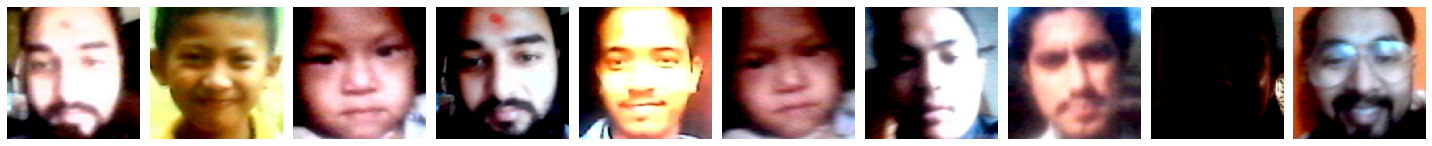

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0.]


In [137]:
plotImages(imgs)
print(labels)

In [112]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [113]:
mobile = MobileNet(weights= "imagenet", include_top = False,   input_tensor=Input(shape=(224,224,3)))
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [167]:
output = Flatten()(mobile.output)
output = Dropout(0.1)(output)
output = Dense(units = 1, activation = "sigmoid")(output)
prediction = Dense(1, activation= "sigmoid")(output)

In [169]:
model = Model(inputs=mobile.input, outputs=output)


In [170]:
for layer in model.layers[:-18]:
    layer.trainable = False

In [171]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [172]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [173]:
model.fit(x=train_batches,
            validation_data=valid_batches,
            epochs=10,
            verbose=2)

Epoch 1/10
169/169 - 104s - loss: 0.0459 - accuracy: 0.9829 - val_loss: 8.2674e-04 - val_accuracy: 1.0000 - 104s/epoch - 616ms/step
Epoch 2/10
169/169 - 111s - loss: 5.1944e-04 - accuracy: 1.0000 - val_loss: 3.9927e-04 - val_accuracy: 1.0000 - 111s/epoch - 657ms/step
Epoch 3/10
169/169 - 102s - loss: 1.9747e-04 - accuracy: 1.0000 - val_loss: 3.2784e-04 - val_accuracy: 1.0000 - 102s/epoch - 604ms/step
Epoch 4/10
169/169 - 99s - loss: 1.5220e-04 - accuracy: 1.0000 - val_loss: 2.8870e-04 - val_accuracy: 1.0000 - 99s/epoch - 588ms/step
Epoch 5/10
169/169 - 103s - loss: 9.9136e-05 - accuracy: 1.0000 - val_loss: 1.7609e-04 - val_accuracy: 1.0000 - 103s/epoch - 608ms/step
Epoch 6/10
169/169 - 108s - loss: 1.0993e-04 - accuracy: 1.0000 - val_loss: 1.1132e-04 - val_accuracy: 1.0000 - 108s/epoch - 639ms/step
Epoch 7/10
169/169 - 112s - loss: 1.0057e-04 - accuracy: 1.0000 - val_loss: 3.8474e-05 - val_accuracy: 1.0000 - 112s/epoch - 660ms/step
Epoch 8/10
169/169 - 108s - loss: 4.2026e-05 - accurac

In [174]:
test_labels = test_batches.classes

In [175]:
test_batches.class_indices

{'real': 0, 'spoof': 1}

In [183]:
predict = model.predict(test_batches, verbose = 0)

In [184]:
for i in predict:
    print(i)

[2.6989078e-08]
[1.7328166e-06]
[8.618223e-08]
[7.2972364e-07]
[4.0591598e-08]
[1.2086389e-08]
[1.9401242e-08]
[2.9177298e-07]
[2.4855348e-08]
[1.5830294e-07]
[2.2247704e-08]
[2.3524115e-06]
[0.00147188]
[2.8209238e-06]
[2.4644186e-07]
[2.2162535e-06]
[8.499536e-06]
[0.00016522]
[7.1371e-05]
[8.902337e-07]
[7.091595e-07]
[1.4244012e-05]
[2.1234844e-06]
[2.5845613e-05]
[1.4065898e-06]
[4.1173138e-08]
[9.557657e-09]
[1.3509568e-05]
[6.22214e-07]
[6.8479612e-06]
[1.46769e-06]
[8.501684e-08]
[1.4066778e-05]
[3.737033e-09]
[7.395847e-07]
[1.17203625e-08]
[1.2032955e-08]
[1.3134348e-08]
[1.2156464e-08]
[5.5109074e-05]
[4.1487732e-07]
[3.9150553e-05]
[2.620698e-06]
[2.8661448e-06]
[7.750512e-06]
[1.2038977e-07]
[2.2720961e-07]
[5.1729716e-05]
[9.264597e-07]
[0.0001173]
[6.174796e-07]
[1.7194662e-06]
[1.0181115e-05]
[2.7155826e-07]
[1.1439808e-07]
[2.4116849e-05]
[2.9196506e-05]
[1.9892788e-05]
[6.429789e-06]
[8.575288e-06]
[3.963547e-07]
[9.011619e-08]
[8.056698e-08]
[9.400523e-10]
[2.1437657

In [206]:
#round_predictions = np.argmax(predict, axis = -1)
round_predictions = np.round(predict)

In [207]:
for i in round_predictions:
    print(i)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


In [ ]:
import os.path
if os.path.isfile("models/face_recognition_model.h5") is False:
    model.save("models/face_recognition_model.h5")